In [6]:
import json
import pickle

from enbios2.base.experiment import Experiment
from enbios2.generic.files import DataPath

In [7]:
# Open a pickled experiment object. 
exp: Experiment = pickle.load(DataPath("test_data/exp.pkl").open("rb"))

In [8]:
# Let's introspect the experiment 
print(exp.info())
print(json.dumps(exp.hierarchy_root.as_dict(remove_empty_childlist=True), indent=2))

Experiment: 
Activities: 6
  electricity production, wind, >3MW turbine, onshore - electricity production, wind, >3MW turbine, onshore
  electricity production, wind, 1-3MW turbine, onshore - electricity production, wind, 1-3MW turbine, onshore
  electricity production, wind, 1-3MW turbine, offshore - electricity production, wind, 1-3MW turbine, offshore
  electricity production, wind, <1MW turbine, onshore - electricity production, wind, <1MW turbine, onshore
  electricity production, solar tower power plant, 20 MW - electricity production, solar tower power plant, 20 MW
  electricity production, solar thermal parabolic trough, 50 MW - electricity production, solar thermal parabolic trough, 50 MW
Methods: 2
 ('EF v3.1 no LT', 'eutrophication: freshwater no LT', 'fraction of nutrients reaching freshwater end compartment (P) no LT')
 ('EDIP 2003', 'land filling', 'slag and ashes')
Hierarchy (depth): 3
Scenarios: 8

{
  "name": "root",
  "children": [
    {
      "name": "wind",
      "c

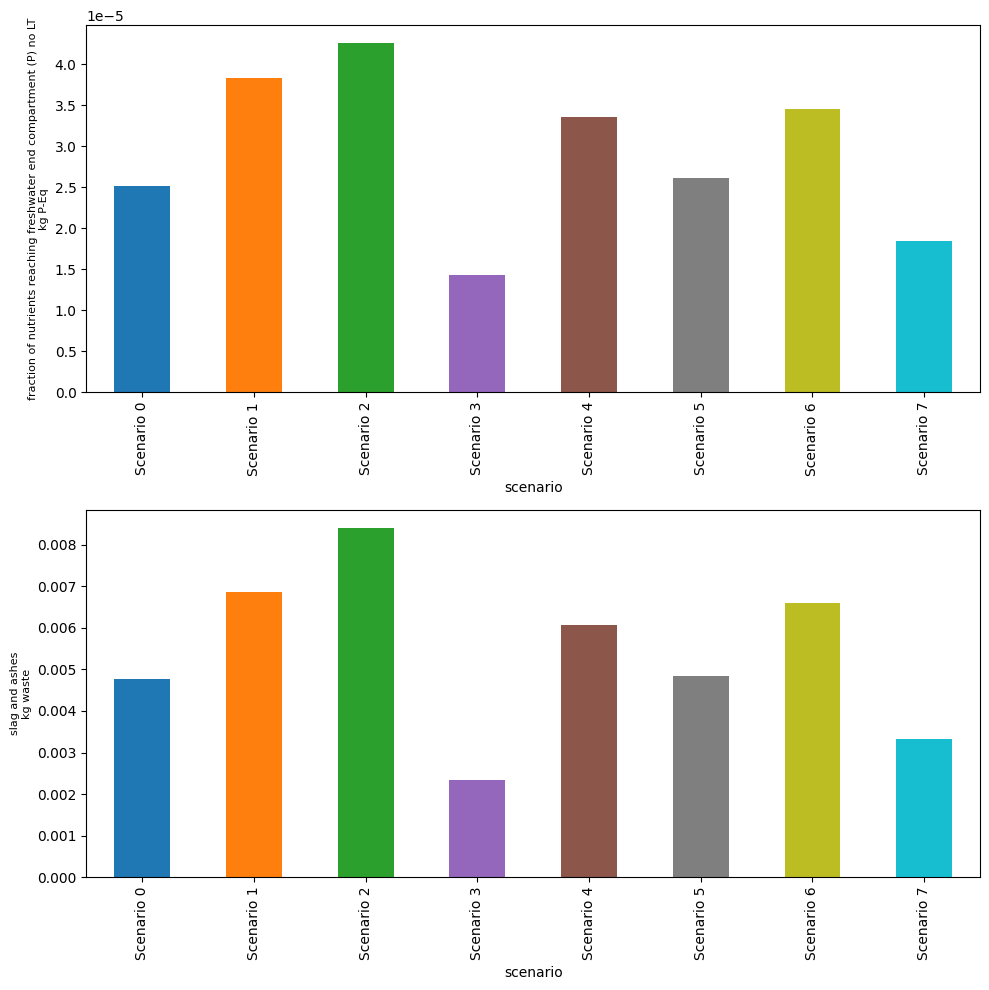

In [9]:
from enbios2.plotting.plot_experiment import bar_plot

bar_plot(exp);

These are a lot of plots. Let's just plot the first two methods. For the most plotting functions we can pass two lists, one for the scenarios and one for the methods. All items of these lists must be aliases of the corresponding collection. We can these aliases with `Experiment.scenario_aliases` and  `Experiment.method_aliases`  

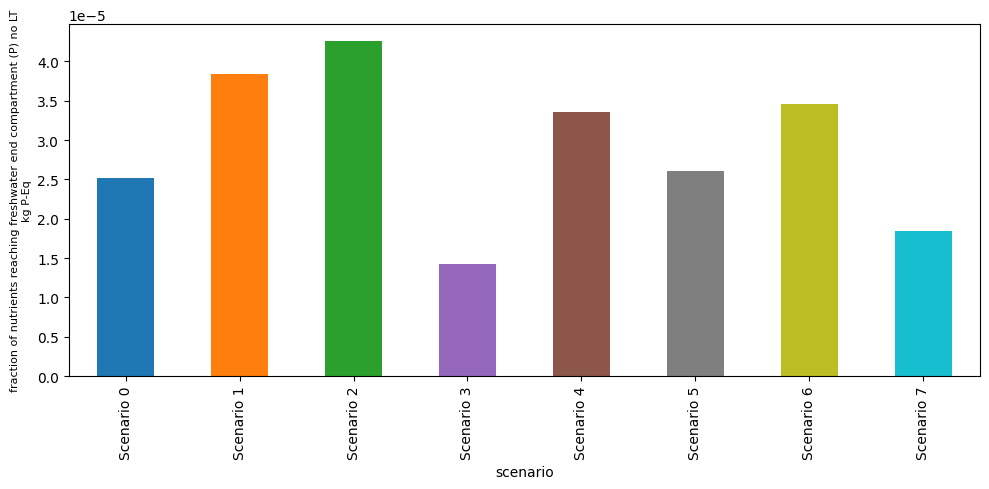

In [10]:
# just plot the first method
bar_plot(exp, methods=exp.method_aliases[:1]);

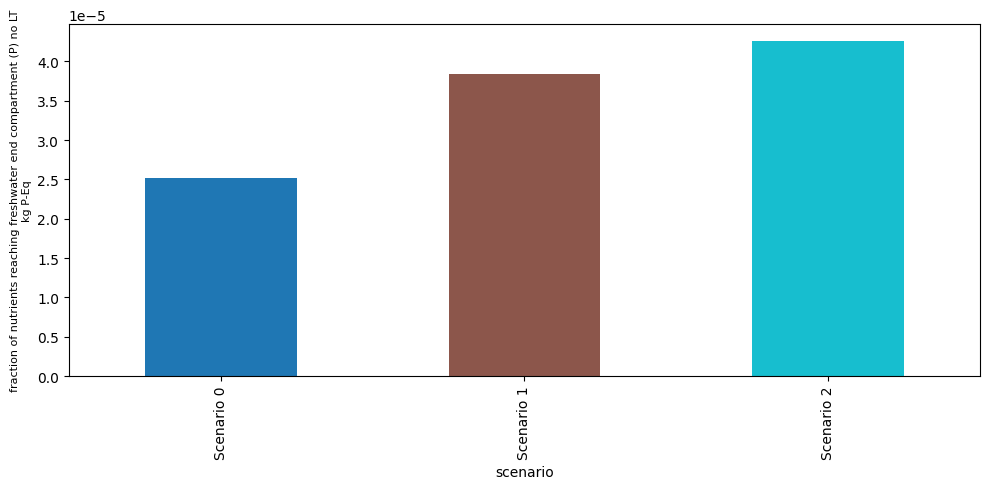

In [11]:
# just plot the first three scenarios for the first method.
bar_plot(exp, scenarios=exp.scenario_aliases[:3], methods=exp.method_aliases[:1]);

Next, we inspect the values of part of the hierarchy. We can do that with the 'stacked_bar_plot' method. Besides the selection of the scenarios and the methods, there are two ways to select which nodes in the hierarchy should be selected.
By default, it selects all nodes on `level = 1`, which are all nodes just below the root. By passing a `level` parameter, we can select another level.

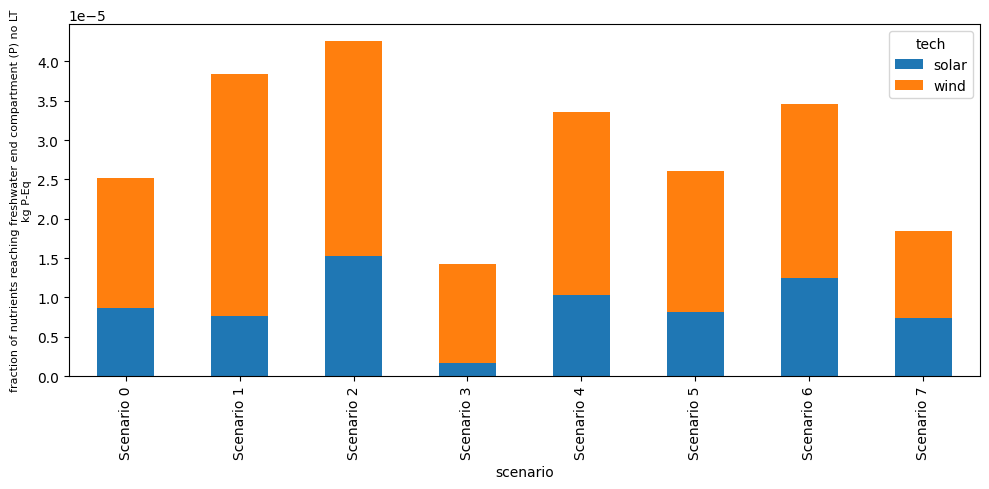

In [12]:
from enbios2.plotting.plot_experiment import stacked_bar_plot

stacked_bar_plot(exp, methods=exp.method_aliases[:1]);

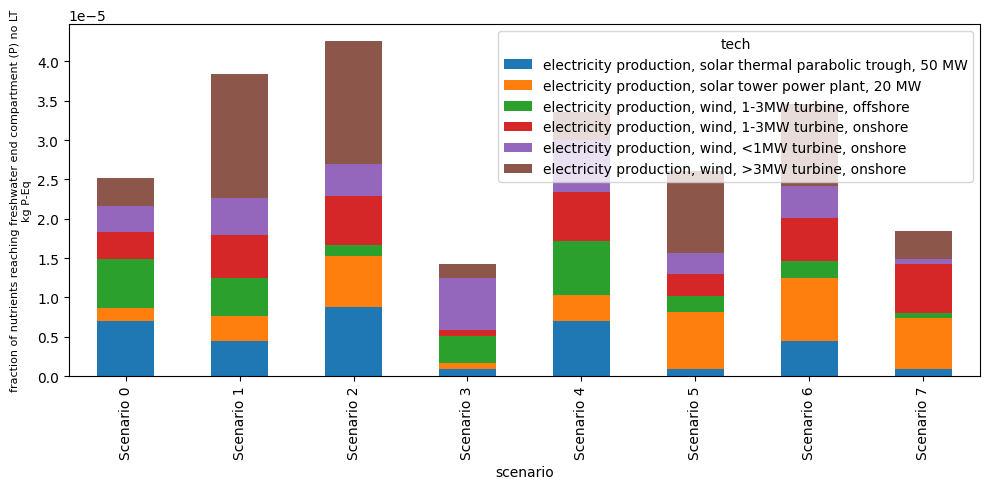

In [13]:
stacked_bar_plot(exp, methods=exp.method_aliases[:1], level=2);

['electricity production, wind, >3MW turbine, onshore', 'electricity production, wind, 1-3MW turbine, onshore', 'electricity production, wind, 1-3MW turbine, offshore', 'electricity production, wind, <1MW turbine, onshore', 'electricity production, solar tower power plant, 20 MW', 'electricity production, solar thermal parabolic trough, 50 MW']


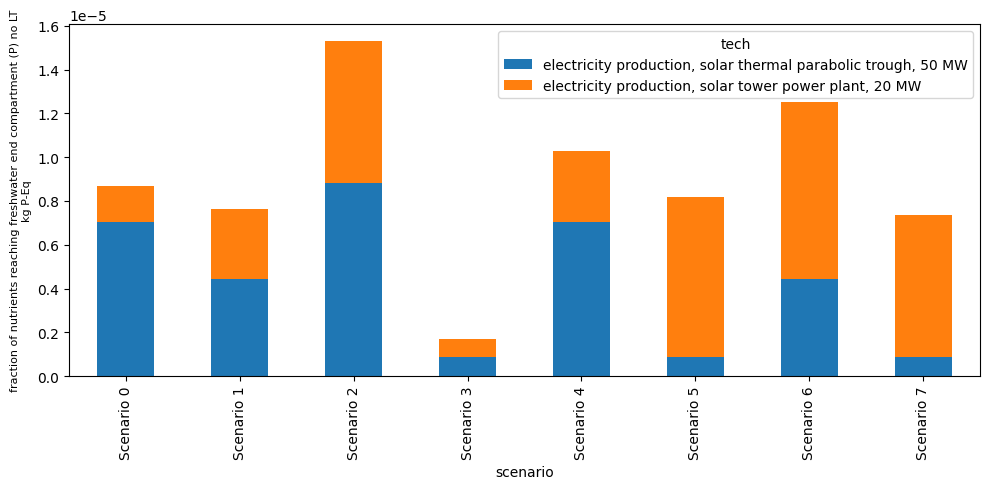

In [14]:
print(exp.activities_aliases)
stacked_bar_plot(exp,
                 methods=exp.method_aliases[:1],
                 aliases=['electricity production, solar tower power plant, 20 MW',
                          'electricity production, solar thermal parabolic trough, 50 MW']);

Next comes a starplot, which normalized the values into the range between the lowest and highest values for each method. Note that for the normalization all scenarios are considered, not just the ones that are selected for plotting. 

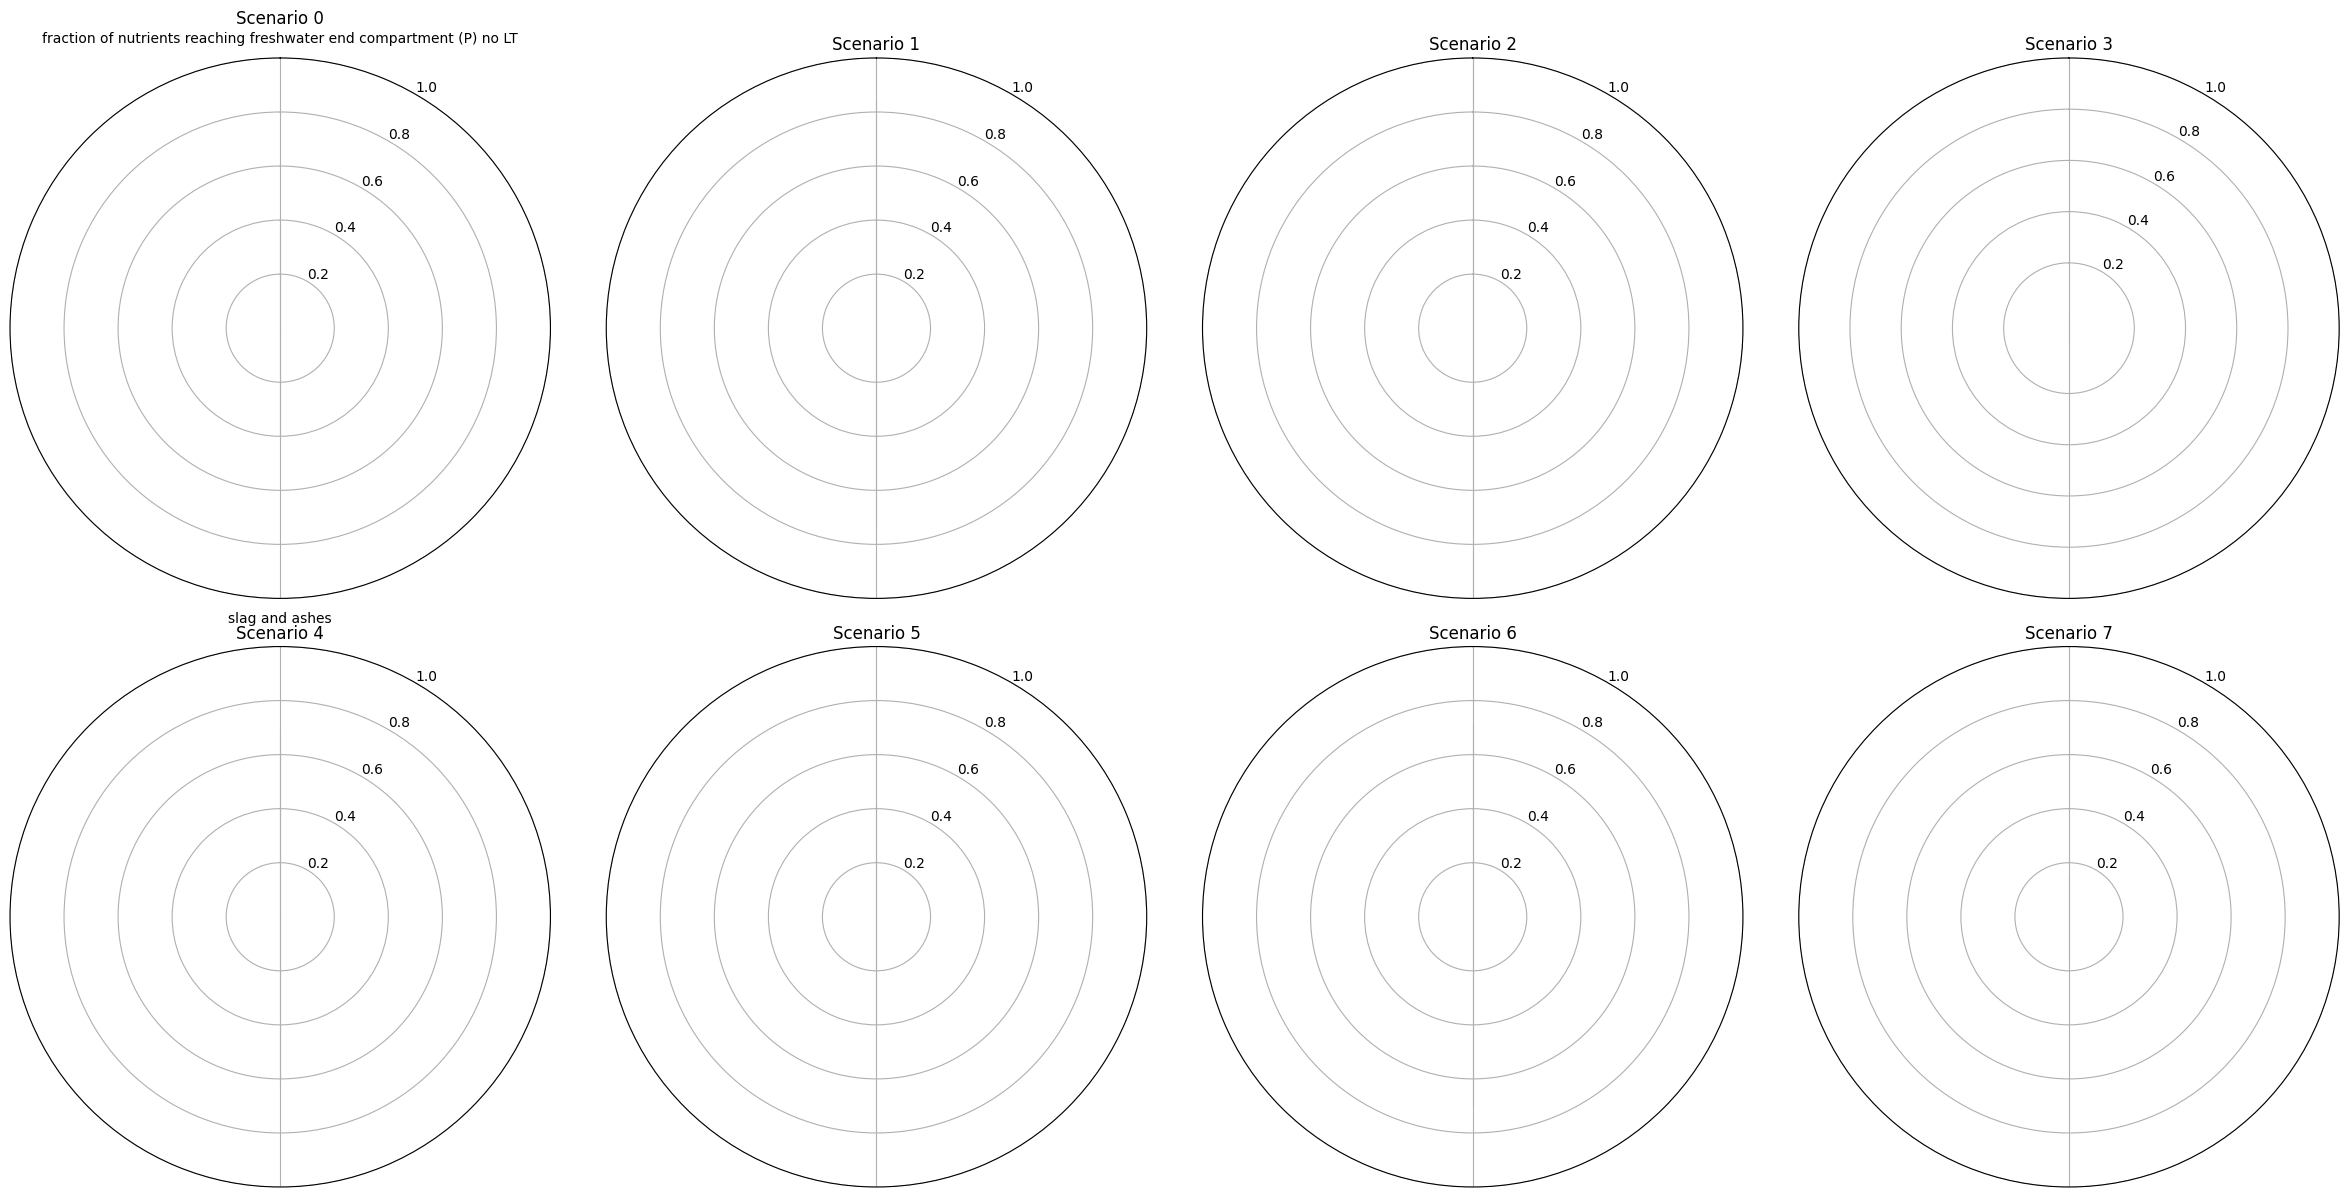

In [18]:
from enbios2.plotting.plot_experiment import star_plot

star_plot(exp, fill=True);

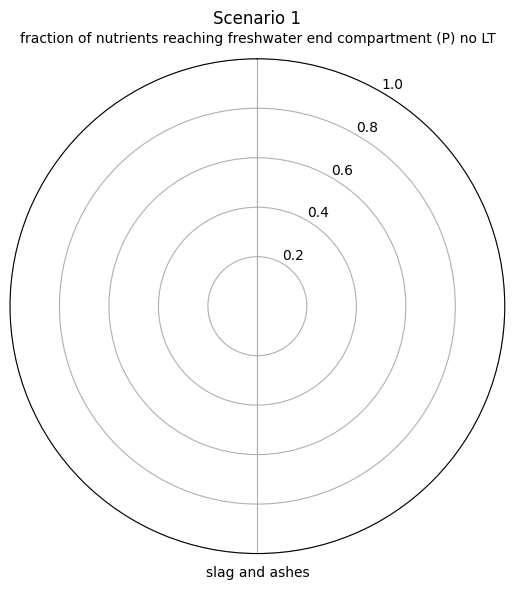

In [17]:
star_plot(exp, scenarios=[exp.scenario_aliases[1]]);

A heatmap also normalizes the values. 

In [ ]:
from enbios2.plotting.plot_experiment import plot_heatmap

plot_heatmap(exp);

Instead of using normalized, we can also pass specific values. For example can we compare the values to some baseline values. All plotting functions use a `ResultsSelector` class in the background for filtering the scenarios, methods or tree-nodes. It also has a function to compare the values to a baseline (`compare_to_baseline`), which should be a numpy array with the same length as the number of methods. The result can be passed to the plotting functions as `special_df`.  

In [ ]:
from enbios2.analyse.util import ResultsSelector
import numpy as np

rs = ResultsSelector.get_result_selector(exp)

df = rs.base_df
df = rs.compare_to_baseline(np.array(df.min()[1:]))
plot_heatmap(exp, special_df=df);

Finally, we have a rudiementary sankey plot. It is not very flexible yet, but it can be useful to get a quick overview of the flows.

In [ ]:
from enbios2.plotting.plot_experiment import plot_sankey

plot_sankey(exp, "Scenario 1", exp.method_aliases[0])